# Multicolour contamination analysis example - plots

*[Hannu Parviainen](mailto:hannu@iac.es)<br>
Instituto de Astrofísica de Canarias*

Last modified: 24.4.2024

In [1]:
%pylab inline

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


In [2]:
import sys
import astropy.units as u
import seaborn as sb

from pathlib import Path
from astropy.table import Table
from pytransit.contamination import true_radius_ratio, apparent_radius_ratio

AAOCW, AAPGW = 3.4645669, 7.0866142

def cnt(kapp, ktrue):
    return 1 - (kapp/ktrue)**2

rstar = 0.4*u.R_sun
kjup = ((1 * u.R_jup).to(u.R_sun) / rstar).value
k3re = ((3 * u.R_earth).to(u.R_sun) / rstar).value
k050 =  true_radius_ratio(k3re, 0.5)
klim = ((0.8 * u.R_jup).to(u.R_sun) / rstar).value

In [3]:
files = sorted(Path('.').glob('Example_??_*noisy.fits'))
files

[PosixPath('Example_5a_no_contamination_noisy.fits'),
 PosixPath('Example_6a_c050_dt0k_noisy.fits'),
 PosixPath('Example_6b_c050_dt500k_noisy.fits'),
 PosixPath('Example_6c_c050_dt1000k_noisy.fits'),
 PosixPath('Example_7a_jupiter_dt0k_noisy.fits'),
 PosixPath('Example_7b_jupiter_dt500k_noisy.fits'),
 PosixPath('Example_7c_jupiter_dt1000k_noisy.fits')]

In [4]:
dfs = []
for f in files:
    df = Table.read(f).to_pandas().iloc[:,2:]
    df['k_true'] = sqrt(df.k2_true)
    df['r_true'] = (df.k_true.values * rstar).to(u.R_jup).value
    df['k_app'] = sqrt(df.k2_app)
    df['cnt'] = cnt(df.k_app, df.k_true)
    dfs.append(df)

cnts = [0.0] + 3*[0.5] + 3*[cnt(k3re, kjup)]
ktrues = [k3re] + 3*[k050] + 3*[kjup]
radii = [(k*rstar).to(u.R_jup) for k in ktrues]
dts = (0.0, 0.0, 500, 1000, 0.0, 500, 1000)

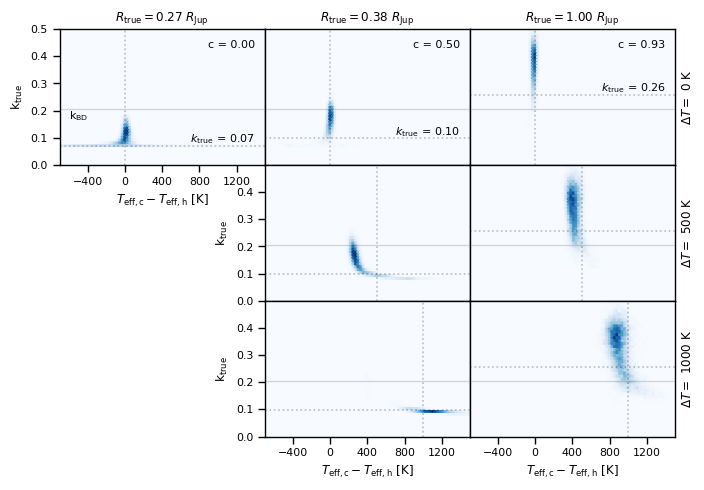

In [5]:
with sb.plotting_context('paper', font_scale=0.9):
    fig, axs = subplots(3, 3, figsize=(AAPGW, 0.7*AAPGW))
    
    def plot_dist(i, ax, text: bool = False):
        df = dfs[i]
        ax.hexbin(df.teff_c-df.teff_h, df.k_true, gridsize=80, extent=(-700, 1500, 0.0, 0.5), cmap=cm.Blues, rasterized=True)
        if text:
            ax.text(1400, 0.46, f'c = {cnts[i]:.2f}', transform=ax.transData, va='top', ha='right', size=8)
            ax.text(1400, ktrues[i], f'$k_\\mathrm{{true}}$ = {ktrues[i]:.2f}', transform=ax.transData, va='bottom', ha='right', size=8)
        ax.axhline(ktrues[i], ls=':', c='k', alpha=0.25)
        ax.axvline(dts[i], ls=':', c='k', alpha=0.25)
        ax.axhline(klim, ls='-', c='k', alpha=0.15, lw=1)
    
    plot_dist(0, axs[0,0], text=True)
    plot_dist(1, axs[0,1], text=True)
    plot_dist(2, axs[1,1])
    plot_dist(3, axs[2,1])
    plot_dist(4, axs[0,2], text=True)
    plot_dist(5, axs[1,2])
    plot_dist(6, axs[2,2])

    axs[0,-1].text(1.03, 0.5, '$\Delta T = $ 0 K', rotation=90, va='center', transform=axs[0,-1].transAxes)
    axs[1,-1].text(1.03, 0.5, '$\Delta T = $ 500 K', rotation=90, va='center', transform=axs[1,-1].transAxes)
    axs[2,-1].text(1.03, 0.5, '$\Delta T = $ 1000 K', rotation=90, va='center', transform=axs[2,-1].transAxes)

    axs[0,0].text(-600, klim, 'k$_\mathrm{BD}$', transform=axs[0,0].transData, ha='left', va='top', size=8)
    
    for iax,i in enumerate((0,1,4)):
        axs[0,iax].set_title(f'$R_\mathrm{{true}} = {radii[i].value:.2f}~R_\mathrm{{Jup}}$')
    
    setp(axs, xlim=(-700, 1500), ylim=(0.0, 0.5))
    setp(axs[0,0], xticks=[-400, 0, 400, 800, 1200], yticks=[0.0, 0.1,0.2,0.3,0.4,0.5], xlabel='$T_\mathrm{eff,c} - T_\mathrm{eff,h}$ [K]')
    setp(axs[-1, 1:], xticks=axs[0,0].get_xticks())
    setp(axs[:-1, 1:], xticks=[])
    setp(axs[:,0], ylabel='k$_\mathrm{true}$')
    setp(axs[-1,:], xlabel=axs[0,0].get_xlabel())
    setp(axs[1:,0], visible=False)
    setp(axs[0,1], yticks=[])
    setp(axs[:,2], yticks=[])
    setp(axs[1:,1], ylabel=axs[0,0].get_ylabel(), yticks=[0.0, 0.1, 0.2, 0.3, 0.4])
    fig.tight_layout()
    fig.subplots_adjust(hspace=0.0, wspace=0.0)
    fig.savefig('m_dwarf_ca_example_plot.pdf')

---
<center>&copy; 2024 Hannu Parviainen</center>